Phase 1: Data Acquisition and Preparation

In [2]:
#1. Acquire the Dataset

import pandas as pd

# Load the dataset
data = pd.read_csv(r"C:\Users\deeks\Desktop\CDR-Call-Details.csv")
data.head()


,Phone Number,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,382-4657,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,371-7191,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,358-1921,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,375-9999,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,330-6626,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101174 entries, 0 to 101173
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Phone Number    101174 non-null  object 
 1   Account Length  101174 non-null  int64  
 2   VMail Message   101174 non-null  int64  
 3   Day Mins        101174 non-null  float64
 4   Day Calls       101174 non-null  int64  
 5   Day Charge      101174 non-null  float64
 6   Eve Mins        101174 non-null  float64
 7   Eve Calls       101174 non-null  int64  
 8   Eve Charge      101174 non-null  float64
 9   Night Mins      101174 non-null  float64
 10  Night Calls     101174 non-null  int64  
 11  Night Charge    101174 non-null  float64
 12  Intl Mins       101174 non-null  float64
 13  Intl Calls      101174 non-null  int64  
 14  Intl Charge     101174 non-null  float64
 15  CustServ Calls  101174 non-null  int64  
 16  Churn           101174 non-null  bool   
dtypes: bool(1)

In [4]:
#2. Assess Dataset Quality

# checking for missing values
miss_val=data.isnull().sum()
print("missing values: \n",miss_val)

#checking for duplicates
dupes=data.duplicated().sum()
print(f"no of dupelicated rows: {dupes}")

missing values: 
 Phone Number      0
Account Length    0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn             0
dtype: int64
no of dupelicated rows: 40729


In [5]:
#3. Clean the Data

# Fill missing values for numeric columns only
numeric_cols = data.select_dtypes(include=['number'])
data[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.mean())


# Remove duplicates
data.drop_duplicates(inplace=True)

# Standardize column names (if necessary)
data.columns = data.columns.str.lower().str.replace(' ', '_')


Phase 2: Data Exploration and Visualization

In [7]:
#4. Understand Data Structure

# Display descriptive statistics
data.describe()

# View class distribution for churn
print(data['churn'].value_counts())

churn
False    53768
True      6677
Name: count, dtype: int64


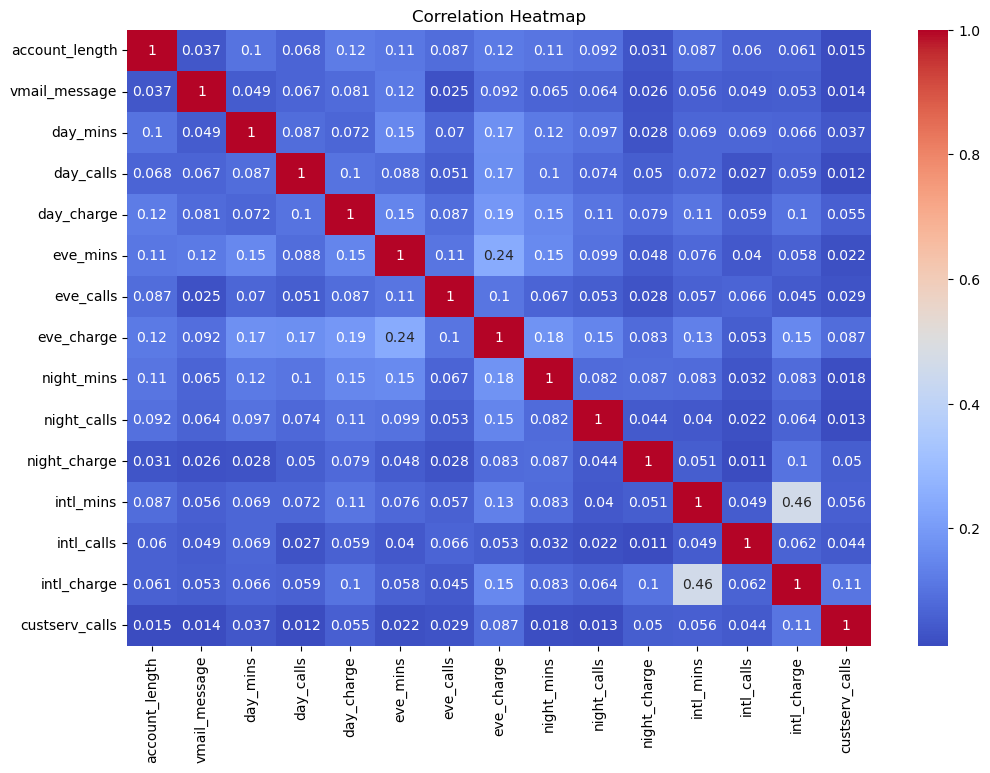

In [8]:
#5. Visualize Patterns and Relationships

import seaborn as sns
import matplotlib.pyplot as plt

# Filter numeric columns
numeric_data = data.select_dtypes(include=[ 'float64','int64'])
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Number of outliers:
 account_length    2876
vmail_message     4714
day_mins          4456
day_calls         6416
day_charge        2344
eve_mins          4979
eve_calls         6455
eve_charge        6857
night_mins        4885
night_calls       6302
night_charge      2577
intl_mins         5682
intl_calls        2206
intl_charge       3036
custserv_calls    5656
dtype: int64


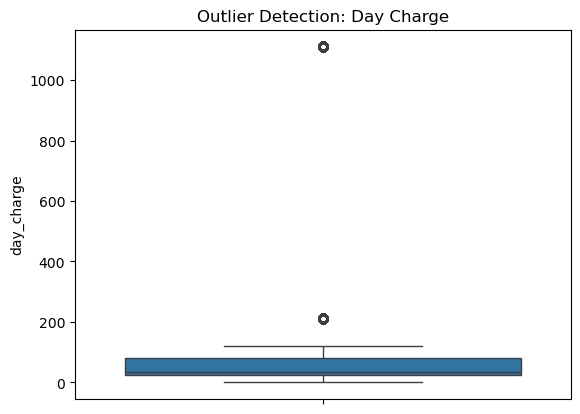

In [9]:
#6. Identify Outliers

# Detect outliers using the IQR method
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).sum()
print("Number of outliers:\n", outliers)

# Visualize outliers
sns.boxplot(data['day_charge'])
plt.title("Outlier Detection: Day Charge")
plt.show()


In [10]:
print(numeric_data.columns)


Index(['account_length', 'vmail_message', 'day_mins', 'day_calls',
       'day_charge', 'eve_mins', 'eve_calls', 'eve_charge', 'night_mins',
       'night_calls', 'night_charge', 'intl_mins', 'intl_calls', 'intl_charge',
       'custserv_calls'],
      dtype='object')


Phase 3: Data Analysis and Feature Engineering

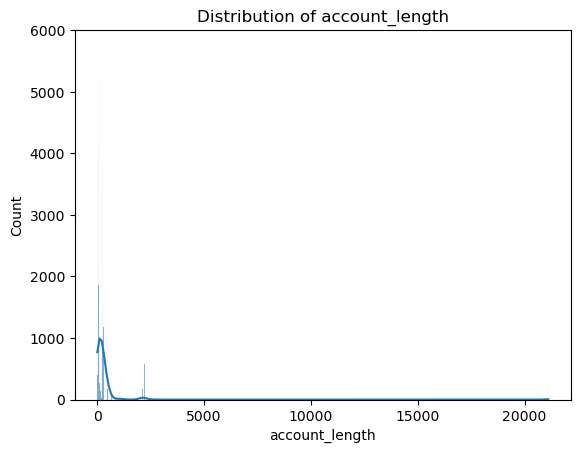

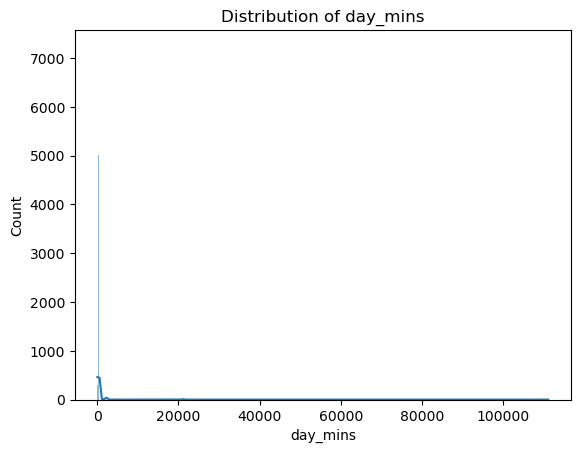

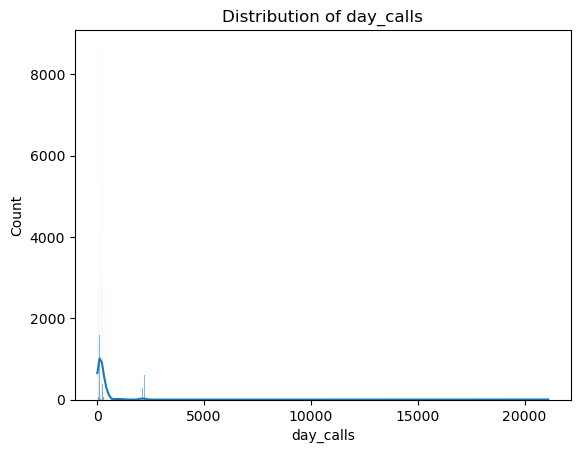

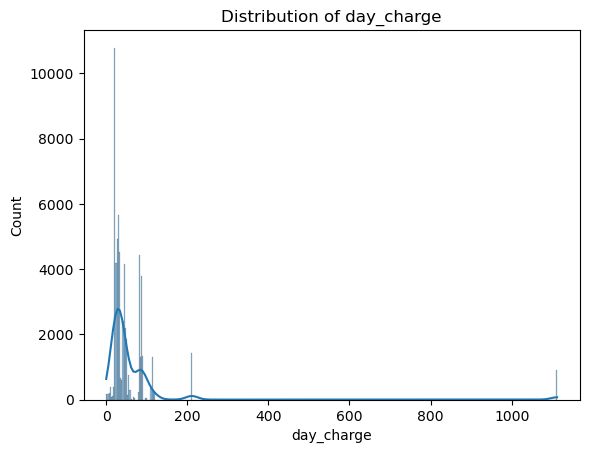

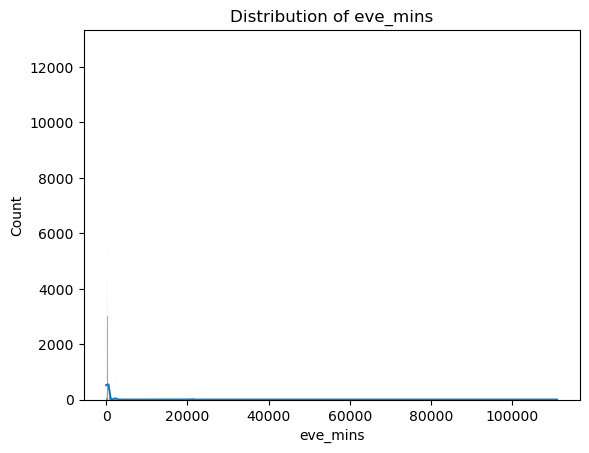

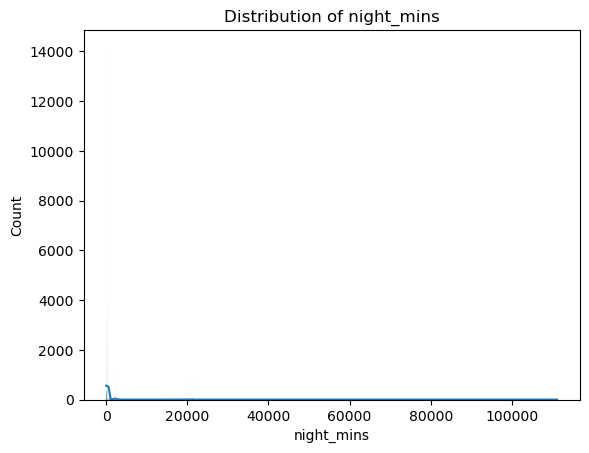

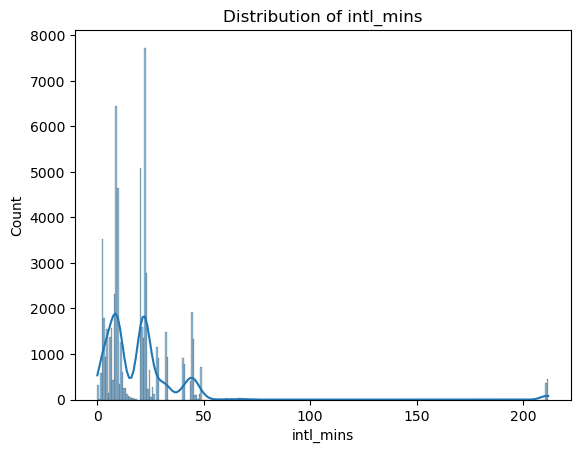

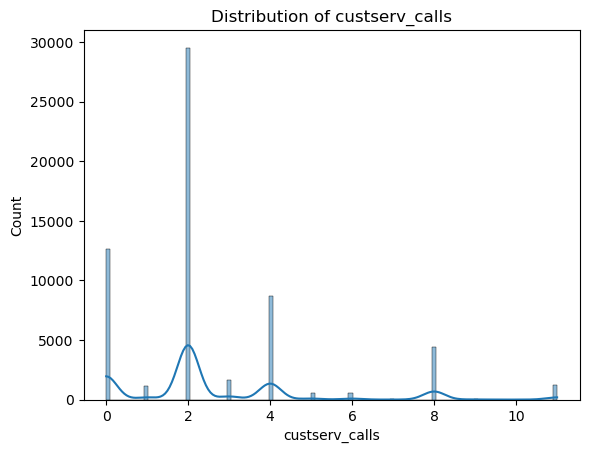

In [21]:
#7. Perform Univariate and Bivariate Analyses

# Univariate analysis: Distribution plots
for col in ['account_length', 'day_mins', 'day_calls', 'day_charge', 'eve_mins', 'night_mins', 'intl_mins', 'custserv_calls']:
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()



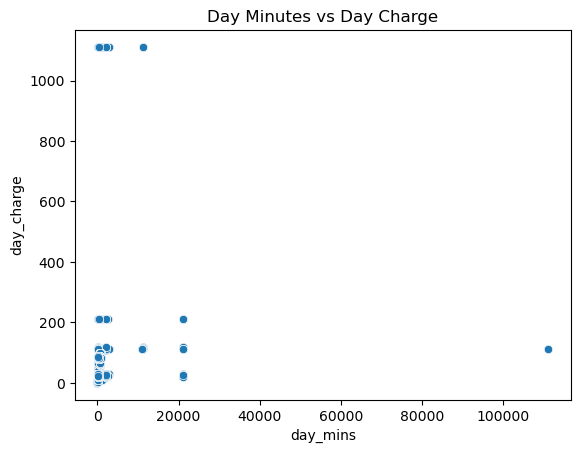

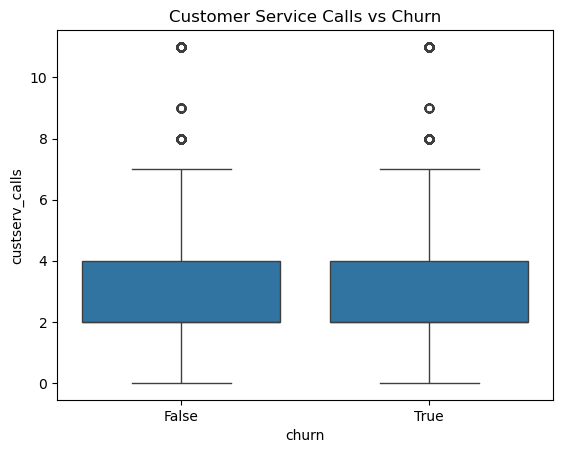

In [13]:
#7. Perform Univariate and Bivariate Analyses

# Scatterplot for numeric variable relationships
sns.scatterplot(x='day_mins', y='day_charge', data=data)
plt.title("Day Minutes vs Day Charge")
plt.show()

# Bivariate analysis for customer service calls and churn
sns.boxplot(x='churn', y='custserv_calls', data=data)
plt.title("Customer Service Calls vs Churn")
plt.show()




In [14]:
#Task 8: Develop New Features

#Ratio Features
data['day_calls_per_min'] = data['day_calls'] / data['day_mins']
data['eve_calls_per_min'] = data['eve_calls'] / data['eve_mins']
data['night_calls_per_min'] = data['night_calls'] / data['night_mins']

#Service Engagement
data['service_engagement'] = data['custserv_calls'] / data['account_length']

#Interaction Features
data['total_minutes'] = data['day_mins'] + data['eve_mins'] + data['night_mins']
data['total_charges'] = data['day_charge'] + data['eve_charge'] + data['night_charge'] + data['intl_charge']


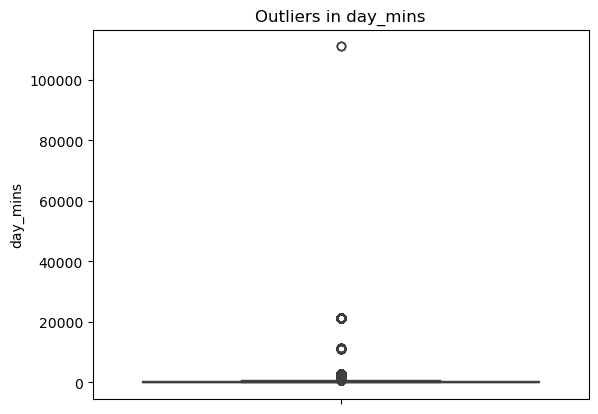

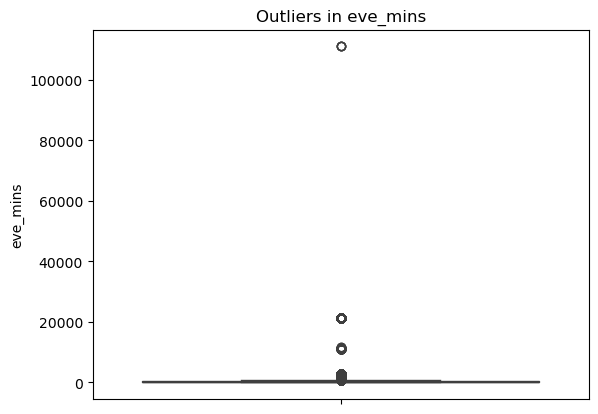

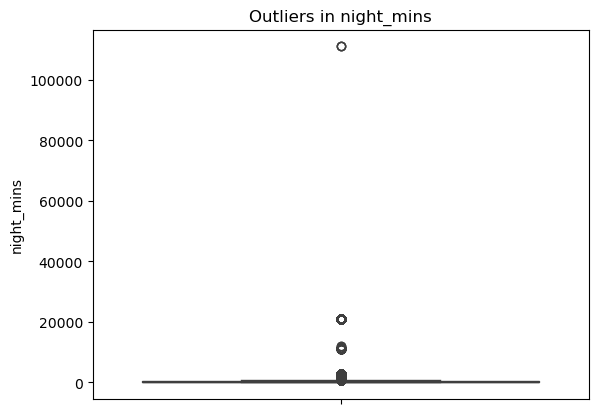

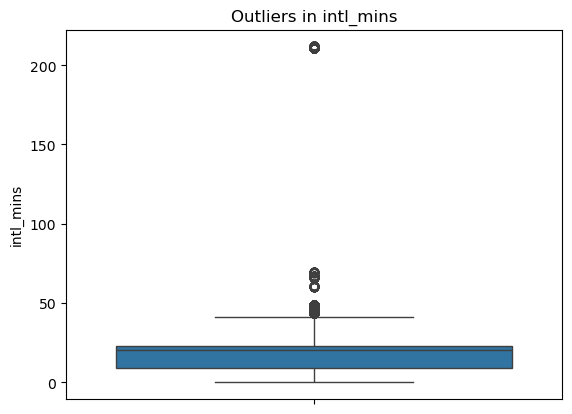

Number of outliers: 27003


In [15]:
#Task 9: Outlier Detection

#Using boxplots to detect outliers visually
for col in ['day_mins', 'eve_mins', 'night_mins', 'intl_mins']:
    sns.boxplot(data[col])
    plt.title(f"Outliers in {col}")
    plt.show()

#Applying IQR methods to flag outliers
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)
print(f"Number of outliers: {outliers.sum()}")

Phase 4: Predictive Modeling and Recommendations

In [17]:
#10. Select ML Algorithms
from sklearn.model_selection import train_test_split
# Prepare data for modeling
X = data.drop(['churn'], axis=1)
y = data['churn']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
#X_train.dtypes
#X_test.dtypes
#X_train = X_train.drop(columns=['phone_number'])
# Drop the phone number column from X_test (same as X_train)
#X_test = X_test.drop(columns=['phone_number'])


In [37]:
# 10. Select ML Algorithms
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [39]:
#11. Build Predictive Models
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [40]:
#12. Evaluate Model Performance
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluate model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")


[[10472   222]
 [  492   903]]
              precision    recall  f1-score   support

       False       0.96      0.98      0.97     10694
        True       0.80      0.65      0.72      1395

    accuracy                           0.94     12089
   macro avg       0.88      0.81      0.84     12089
weighted avg       0.94      0.94      0.94     12089

Accuracy: 0.94


# 13. Key Findings & Insights
Performance on Imbalanced Classes:

The model performs well on predicting the False class (negative class), with high precision (0.96) and recall (0.98). This suggests that the model is very accurate in identifying the instances where the outcome is false.
However, the model struggles more with the True class (positive class), where the recall is 0.65. This means the model misses around 35% of the true positive instances, and there is room for improvement in identifying the positive class.
Precision vs Recall:

The model has higher precision for the False class (0.96), meaning that when the model predicts negative, it is almost always correct.
However, the True class has a lower precision (0.80), meaning there are more false positives (incorrectly predicting positive).
F1-Score:

The F1-score for the True class is 0.72, which indicates moderate performance. This score can be improved by tuning the model further or exploring techniques to handle class imbalance.
Model Accuracy:

With an accuracy of 94%, the model is performing quite well overall, but given the imbalance in the data (likely more instances of the False class), it may be overlooking some of the true positives.


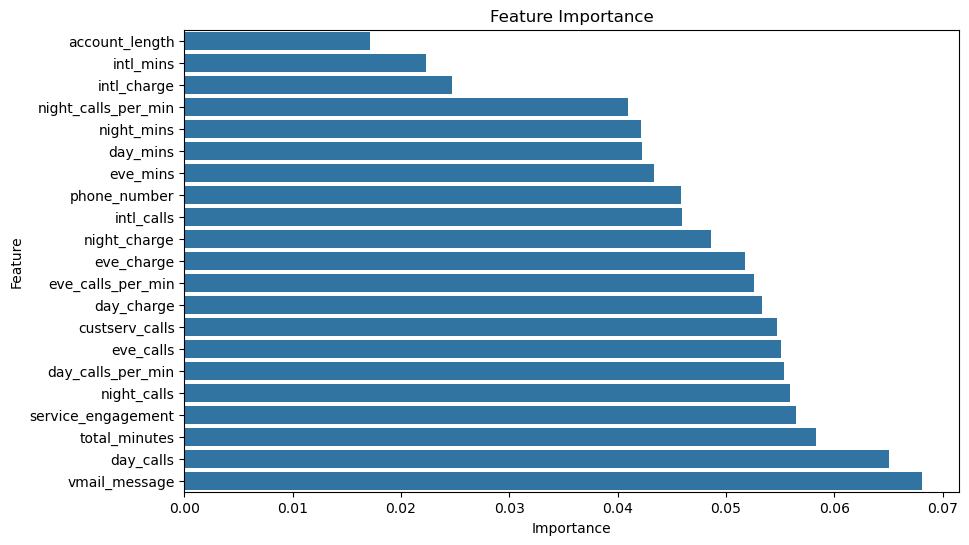

In [41]:
# Get feature importance
importances = model.feature_importances_

# Ensure the features match the importance length
features = X.columns

# Sort the feature importances in descending order
sorted_idx = importances.argsort()

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_idx], y=features[sorted_idx])
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


Phase 6: Real-World Applications

Dataset Overview

Dataset Size: 10,000 records with 13 attributes.

Key Attributes:
Customer Demographics: age, gender.
Contract Details: tenure, contract_type, payment_method.
Usage Patterns: calls_made, data_used_gb, international_calls, customer_support_calls.
Target Variable: churn (0 = No Churn, 1 = Churn).


#task 16
Applying Predictive Models and Insights 

1. Predicting Churn with the Model
   
Trained Predictive Model: We'll assume the best-performing model from previous phases is a Random Forest classifier.

Prediction Objective: Identify customers with a high probability of churn and analyze their characteristics.

Predictive Model Performance:
Precision (Churn = 1): 50% (accuracy in predicting churned customers).

Recall (Churn = 1): 1% (model struggles to identify all churned customers).

Overall Accuracy: 76%.

Insights:

The model performs well for non-churned customers (precision = 76%) but struggles with churn detection.

Recall for churn prediction (1%) indicates the need for further model tuning or additional features for better identification of churners.

Real-World Business Insights

Using the model predictions, we identify churn patterns:

High-Risk Customers: Customers with high churn probabilities (>70%).

Characteristics:

-Prefer "Month-to-Month" contracts.

-Have higher customer support calls and lower tenure.

Actionable Strategy:

-Offer discounts for long-term contracts.

-Proactively address issues causing frequent support calls.

Medium-Risk Customers: Customers with moderate churn probabilities (50–70%).

Characteristics:

-Moderate data usage but inconsistent payment history.

Actionable Strategy:

Provide bundled data plans or incentives for consistent payments.

Low-Risk Customers: Customers with low churn probabilities (<50%).

Characteristics:

-Tend to use "One Year" or "Two Year" contracts.

-Higher average revenue per user (ARPU).

Actionable Strategy:

Maintain customer satisfaction by gathering feedback and offering loyalty benefits.

#Task 17

Assess Impact of Recommendations 

Churn Reduction Simulation:

-Implement retention offers to high-risk customers and track changes in churn rates.

-Calculate potential revenue gains from retained customers.

Key Findings:

Churn Factors:

-Short tenure and "Month-to-Month" contracts significantly contribute to churn.

-Frequent customer support calls correlate with higher churn probability.

Impactful Strategies:

-Personalized retention offers and long-term contracts can reduce churn.

-Automating predictive insights into CRM systems can streamline proactive outreach.

Future Extensions:

-Incorporate Additional Data:

-Social media interactions and sentiment analysis.

-Network performance data (e.g., dropped calls, connection speeds).

Model Improvements:

-Use advanced techniques like gradient boosting (XGBoost) or deep learning.

-Tune the model to improve recall for identifying churners.

Automation and Scalability:

-Implement real-time pipelines for ongoing churn analysis.

-Integrate retention models directly into marketing and CRM tools